In [1]:
import time, requests, json
import warnings
warnings.filterwarnings('ignore')

In [2]:
#url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)'
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
data = json.loads(requests.get(url = url).json()['data'])
print(len(data))

8


In [3]:
lis = []

for m in range(len(data['areaTree'][0]['children'])):
    for n in range(len(data['areaTree'][0]['children'][m]['children'])):
        info={}
        info['country']=data['areaTree'][0]['name']#国家
        info['province']=data['areaTree'][0]['children'][m]['name']#省份  
        info['city']=data['areaTree'][0]['children'][m]['children'][n]['name']#城市   len(data['areaTree'][0]['children'][0]['children'])
        info['total_confirm']=data['areaTree'][0]['children'][m]['children'][n]['total']['confirm']
        info['total_suspect']=data['areaTree'][0]['children'][m]['children'][n]['total']['suspect']
        info['total_dead']=data['areaTree'][0]['children'][m]['children'][n]['total']['dead']
        info['total_heal']=data['areaTree'][0]['children'][m]['children'][n]['total']['heal']
        info['today_confirm']=data['areaTree'][0]['children'][m]['children'][n]['today']['confirm']
        info['today_suspect']=data['areaTree'][0]['children'][m]['children'][n]['today']['suspect']
        info['today_dead']=data['areaTree'][0]['children'][m]['children'][n]['today']['dead']
        info['today_heal']=data['areaTree'][0]['children'][m]['children'][n]['today']['heal']
        lis.append(info)

In [4]:
def catch_distribution():
    """抓取行政区确诊分布"""
    
    data ={}
    for item in lis:
        
        if  item['province'] not in data:
            data.update({item['province']:0})
        data[item['province']] += int(item['total_confirm'])
    
    return data

In [5]:
def catch_daily():
    """抓取每日确诊和死亡数据"""
    
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts&callback=&_=%d'%int(time.time()*1000)
    data = json.loads(requests.get(url=url).json()['data'])
    data.sort(key=lambda x:x['date'])
    
    date_list = list() # 日期
    confirm_list = list() # 确诊
    suspect_list = list() # 疑似
    dead_list = list() # 死亡
    heal_list = list() # 治愈
    for item in data:
        month, day = item['date'].split('/')
        date_list.append(datetime.strptime('2020-%s-%s'%(month, day), '%Y-%m-%d'))
        confirm_list.append(int(item['confirm']))
        suspect_list.append(int(item['suspect']))
        dead_list.append(int(item['dead']))
        heal_list.append(int(item['heal']))
    
    return date_list, confirm_list, suspect_list, dead_list, heal_list

In [6]:
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.figure
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
def plot_daily():
    """每日确诊和死亡""" 
    date_list, confirm_list, suspect_list, dead_list, heal_list = catch_daily() # 获取数据
    
    plt.figure('2019-nCoV daily analisis', facecolor='#f4f4f4', figsize=(10, 8))
    plt.title('2019-nCoV daily analisis', fontsize=20)
    
    plt.plot(date_list, confirm_list, label='Confirmed')
    plt.plot(date_list, suspect_list, label='Suspected')
    plt.plot(date_list, dead_list, label='Deaths')
    plt.plot(date_list, heal_list, label='Recovered')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) # 格式化时间轴标注
    plt.gcf().autofmt_xdate() # 优化标注（自动倾斜）
    plt.grid(linestyle=':') # 显示网格
    plt.legend(loc='best') # 显示图例
    plt.savefig('2019-nCoV daily analisis.png') # 保存为文件
    plt.show()

In [19]:
pip install pyecharts

     |████████████████████████████████| 174kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 1.5MB/s eta 0:00:01
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=c1c5aee14bf197fffe2006be3f6b14fcd90d66408ecf7e914b7bcd533df0de43
  Stored in directory: /home/iko070/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for simplejson: filename=simplejson-3.17.0-cp37-cp37m-linux_x86_64.whl size=124749 sha256=a0c74b960a86335a22112768931fd416913a3a641c32ed4d5dcbfc4c7eae8659
  Stored in directory: /home/iko070/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built prettytable simplejson
Note: you may need to restart the kernel to use updated packages.


In [13]:
def daily_plotly():
    date_list, confirm_list, suspect_list, dead_list, heal_list = catch_daily() # 获取数据
    
    fig = go.Figure()
    
    fig.add_trace( go.Scatter(x = date_list, y = confirm_list, name = 'Confirmed'))
    fig.add_trace(go.Scatter(x = date_list, y = suspect_list, name = 'Suspected'))
    fig.add_trace(go.Scatter(x = date_list, y = dead_list, name = 'Deaths'))
    fig.add_trace(go.Scatter(x = date_list, y = heal_list, name = 'Recovered'))
    

    fig.update_layout(title = '2020-nCoV daily plot')
    
    fig.show()
    

In [28]:
from pyecharts.charts import Map, Geo
from pyecharts import options as opts

In [39]:
province_distribution = catch_distribution()

map = Map()
map.set_global_opts(title_opts = opts.TitleOpts(title = "20200209 casses distribution"),
                   visualmap_opts = opts.VisualMapOpts(max_=3600, is_piecewise = True),
                   pieces=[ {"max": 5000, "min": 1001, "label": ">1000", "color": "#8A0808"},
                           {"max": 1000, "min": 500, "label": "500-1000", "color": "#B40404"},
                           {"max": 499, "min": 100, "label": "100-499", "color": "#DF0101"},
                           {"max": 99, "min": 10, "label": "10-99", "color": "#F78181"},
                           {"max": 9, "min": 1, "label": "1-9", "color": "#F5A9A9"},
                           {"max": 0, "min": 0, "label": "0", "color": "#FFFFFF"}])  

map.add("2020 casses distribution", data_paire = province_distribution.items(),
       maptype = 'china', is_roam = True)
map.render('2020 casses distribution.html')

TypeError: set_global_opts() got an unexpected keyword argument 'pieces'

In [27]:
map_virus = Map("Daily distribution 09/02/2020", width=1000, height=800)
map_virus.add('China', 
              catch_distribution[0], 
              catch_distribution[1], 
              is_map_symbol = True, 
              maptype = 'china',
             is_visualmap = True, 
              is_piecewise = True, 
              visual_text_color = '#000',
             is_label_show = True,
             pieces = [
                 {"max": 10000, "min": 1001, "label": ">1000"},
            {"max": 1000, "min": 500, "label": "500-1000"},
            {"max": 499, "min": 200, "label": "200-499"},
            {"max":199,"min":100,"label":"100-199"},
            {"max":99,"min":10,"label":"10-99"},
             {"max":9,"min":1,"label":"1-9"}])
map_virus.render('Casses map 09/02/2020')

AttributeError: 'str' object has no attribute 'get'

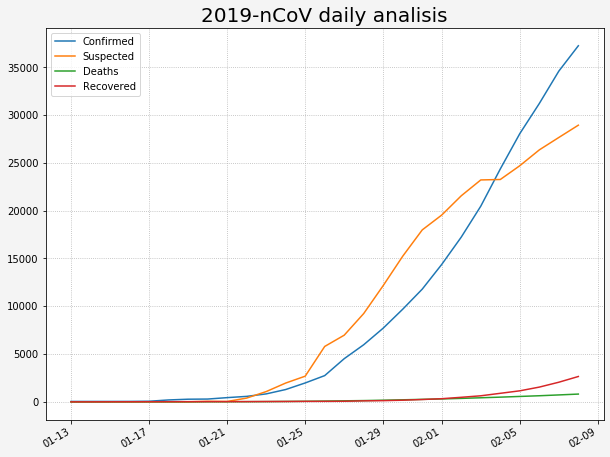

In [14]:
if __name__ == '__main__':
    plot_daily()
    daily_plotly()